In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('wine.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

<Axes: xlabel='quality', ylabel='alcohol'>

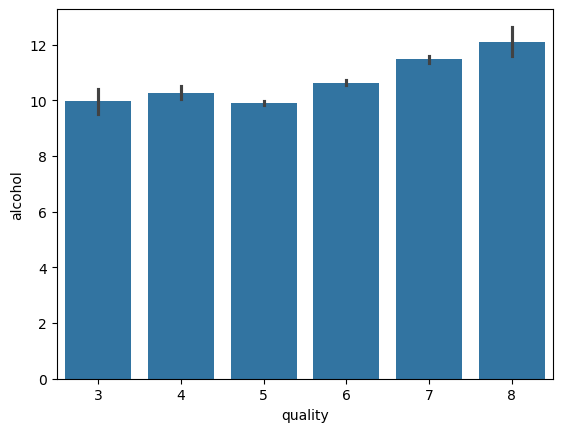

In [8]:
sns.barplot(x = data['quality'],y = data['alcohol'])

In [9]:
x = data.drop(columns = ['quality'])
y = data['quality'].apply(lambda y_value:1 if y_value>=7 else  0)

In [10]:
y.unique()

array([0, 1])

In [11]:
x.shape

(1599, 11)

In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = rf.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
score = accuracy_score(y_test,y_pred)

In [19]:
print(score)

0.934375


Text(0.5, 1.0, 'Actual vs Predicted')

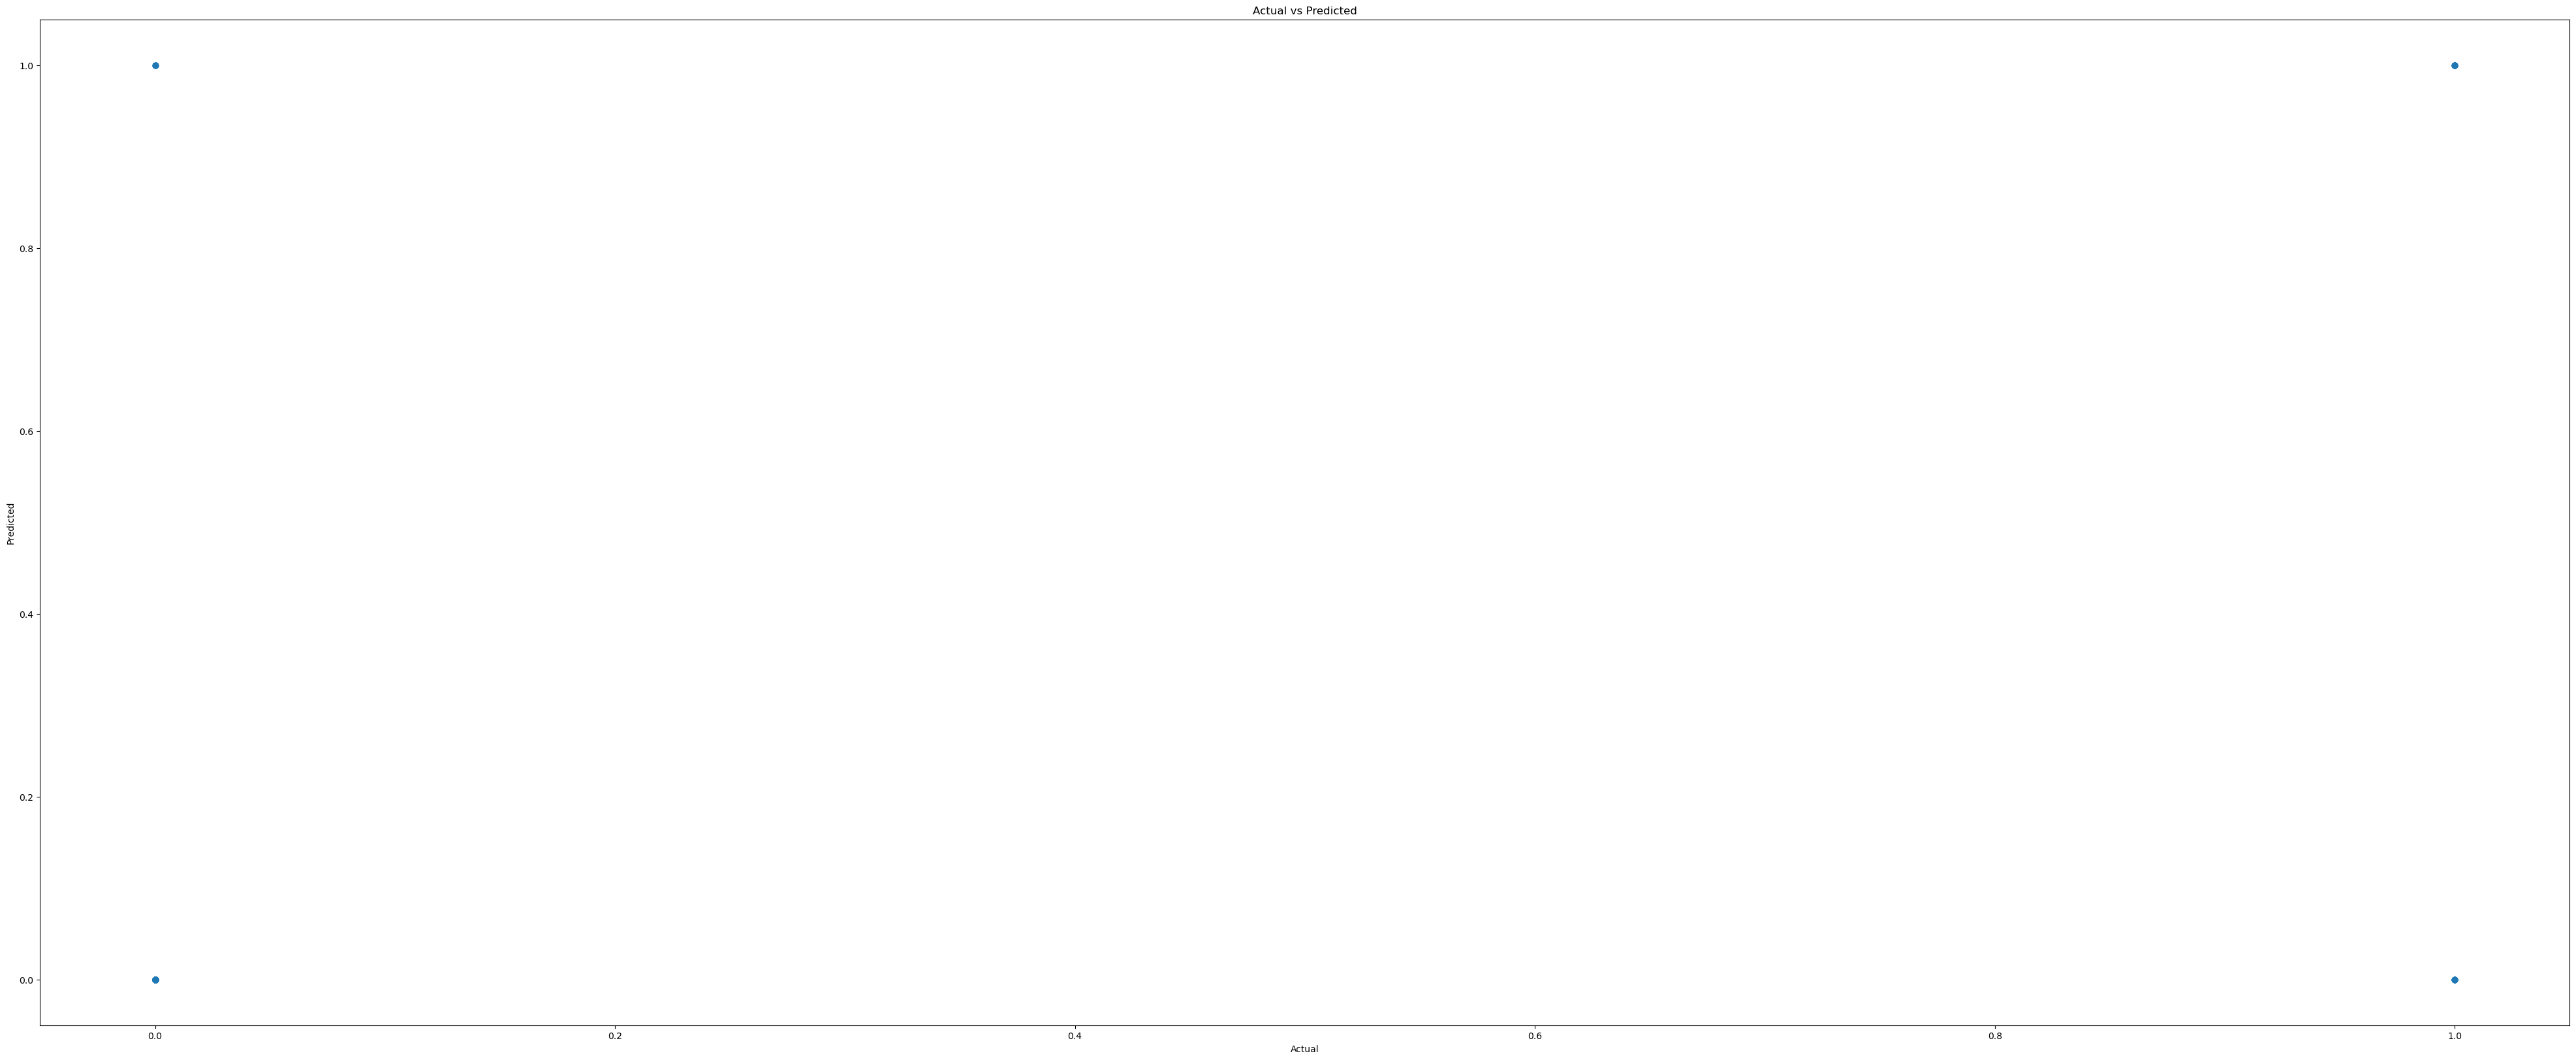

In [20]:
plt.figure(figsize = (50,20))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

Text(0.5, 1.0, 'residual_plot')

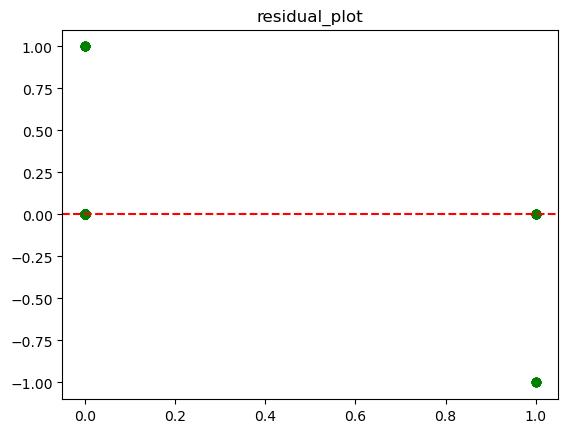

In [21]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals,color = 'green')
plt.axhline(0,color = 'red',linestyle = '--')
plt.title('residual_plot')

<Axes: xlabel='quality', ylabel='Count'>

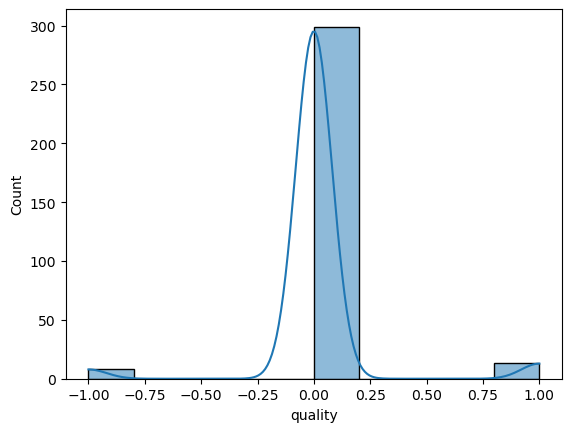

In [22]:
sns.histplot(residuals,kde = True)

In [206]:
rfc = RandomForestClassifier()
rfc_final = rfc.fit(x,y)

In [207]:
import joblib

In [208]:
joblib.dump(rfc_final,'wine_quality_prediction')

['wine_quality_prediction']

In [209]:
model = joblib.load('wine_quality_prediction')

In [210]:
input = (7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
input_f = np.asarray(input)

In [211]:
input_resh = input_f.reshape(1,-1)

In [212]:
input_resh

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [213]:
prediction = model.predict(input_resh)
print(prediction)
if(prediction == 1):
    print('quality is good')
else:
    print("quality is bad")

[0]
quality is bad


In [218]:
data['quality'] = 7